In [74]:
# List of Libraries used in the project

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.linear_model import LinearRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

#Data Gathering and Exploration:

In [75]:
songs = pd.read_csv('/content/data.csv')
songs.shape

(170653, 19)

In [76]:
songs.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


In [77]:
songs.tail(10)

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
170643,0.9070,2020,0.00952,"['DJ Scheme', 'Cordae', 'Ski Mask The Slump Go...",0.917,228333,0.56900,1,3C9D1X8NkG2Ak1RaGpRnnQ,0.000000,7,0.0774,-10.456,1,Soda (feat. Take A Daytrip),66,2020-11-13,0.2790,144.014
170644,0.4660,2020,0.31000,['Fleet Foxes'],0.562,253613,0.68600,0,308prODCCD0O660tIktbUi,0.022500,7,0.1250,-8.480,1,Sunblind,66,2020-09-22,0.0249,103.054
170645,0.1690,2020,0.99400,['Ólafur Arnalds'],0.281,190500,0.03330,0,13MOQ6oQqkrZEDkZOHukCw,0.959000,6,0.0995,-31.460,1,We Contain Multitudes (from home),70,2020-08-26,0.0348,90.250
170646,0.5220,2020,0.20400,['Gunna'],0.598,230600,0.47200,1,2f8y4CuG57UJEmkG3ujd0D,0.000015,0,0.1080,-10.991,1,NASTY GIRL / ON CAMERA,66,2020-05-22,0.2580,120.080
170647,0.0838,2020,0.97400,['Najma Wallin'],0.175,133500,0.00759,0,6RuFOroO9VO0aMGEzirLHk,0.925000,7,0.1130,-35.072,1,Med slutna ögon,70,2020-02-21,0.0454,70.872
170648,0.6080,2020,0.08460,"['Anuel AA', 'Daddy Yankee', 'KAROL G', 'Ozuna...",0.786,301714,0.80800,0,0KkIkfsLEJbrcIhYsCL7L5,0.000289,7,0.0822,-3.702,1,China,72,2020-05-29,0.0881,105.029
170649,0.7340,2020,0.20600,['Ashnikko'],0.717,150654,0.75300,0,0OStKKAuXlxA0fMH54Qs6E,0.000000,7,0.1010,-6.020,1,Halloweenie III: Seven Days,68,2020-10-23,0.0605,137.936
170650,0.6370,2020,0.10100,['MAMAMOO'],0.634,211280,0.85800,0,4BZXVFYCb76Q0Klojq4piV,0.000009,4,0.2580,-2.226,0,AYA,76,2020-11-03,0.0809,91.688
170651,0.1950,2020,0.00998,['Eminem'],0.671,337147,0.62300,1,5SiZJoLXp3WOl3J4C8IK0d,0.000008,2,0.6430,-7.161,1,Darkness,70,2020-01-17,0.3080,75.055
170652,0.6420,2020,0.13200,"['KEVVO', 'J Balvin']",0.856,189507,0.72100,1,7HmnJHfs0BkFzX4x8j0hkl,0.004710,7,0.1820,-4.928,1,Billetes Azules (with J Balvin),74,2020-10-16,0.1080,94.991


In [78]:
songs.columns

Index(['valence', 'year', 'acousticness', 'artists', 'danceability',
       'duration_ms', 'energy', 'explicit', 'id', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mode', 'name', 'popularity', 'release_date',
       'speechiness', 'tempo'],
      dtype='object')



**Introduction of Features :**




**Identifier (ID):** A unique code assigned to each individual track.

**Title:** The name of the track.

**Artists:** The performer or performers involved in the creation of the track.

**Duration (ms):** The length of the track measured in milliseconds (ms).

**Release Date:** The date when the track was officially made available, given in MM/DD/YYYY format or at least YYYY.

**Year:** The calendar year when the track was initially launched.

**Acousticness:** An indicator ranging from 0.0 to 1.0, representing the likelihood that the track is acoustic.

**Danceability:** Describing the track's suitability for dancing, with a score of 0.0 indicating the least danceable and 1.0 the most danceable.

**Energy**: A measure between 0.0 and 1.0, reflecting the perceived intensity and activity of the track. Typically, energetic tracks are fast-paced and loud.

**Instrumentalness:** An estimation of whether a track is instrumental, predicting the absence of vocals.

**Liveness:** Identifying the presence of an audience or live recording in the track.

**Loudness:** The overall volume or loudness of a track measured in decibels (dB).
Speechiness: Recognizing the occurrence of spoken words in a track.

**Tempo:** The estimated overall tempo of a track measured in beats per minute (BPM).

**Valence:** A rating from 0.0 to 1.0 indicating the musical positivity conveyed by a track.

**Mode:** Representing the melodic content modality of a track, where 1 indicates Major and 0 indicates Minor.

**Key:** The approximated overall key of a track using Pitch Class notation, with 0 representing C, 1 for C♯/D♭, 2 for D, and so forth.

**Popularity:** A measure of a track's popularity, ranging from 0 to 100, with 100 being the most popular according to Spotify's algorithm.

**Explicit:** Indicating whether the track contains explicit lyrics, where 1 denotes True and 0 denotes False.

In [79]:
"""
We're getting rid of a few of the columns beacuse they are not usefull in our analysis:
- id: It has a alpha - numeric which gives the identification for each song, doesn't tell us much.
- release_date: We'll stick to the year for trend analysis.
Here's the code for dropping these columns in our 'songs' data:
"""

songs = songs.drop(columns = ['id','release_date'] )

In [80]:
import ast
def fetch_list(strings):
    l=[]
    for i in ast.literal_eval(strings):
        l.append(i)
        return l

songs['artists'] = songs['artists'].apply(fetch_list)
songs['artists'] = songs['artists'].apply(lambda x: " ".join(x))
songs['artists'] = songs['artists'].apply(lambda x: x.lower())
songs['artists'].value_counts()

francisco canaro             2227
эрнест хемингуэй             1211
эрих мария ремарк            1068
frédéric chopin              1016
wolfgang amadeus mozart       920
                             ... 
it looks sad.                   1
pham                            1
plums                           1
calming rainforest sounds       1
najma wallin                    1
Name: artists, Length: 20576, dtype: int64

In [81]:
songs.dtypes # data types of each  feature

valence             float64
year                  int64
acousticness        float64
artists              object
danceability        float64
duration_ms           int64
energy              float64
explicit              int64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
name                 object
popularity            int64
speechiness         float64
tempo               float64
dtype: object

In [82]:
songs[songs.duplicated()] # There are arround 565 records having duplicates

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo
2298,0.7700,1933,0.930000,billie holiday,0.721,155667,0.186,0,0.000145,3,0.3510,-13.833,1,No Regrets - Take 1,17,0.0458,129.452
2340,0.9450,1933,0.958000,billie holiday,0.761,173667,0.420,0,0.037500,10,0.1390,-10.011,1,Spreadin' Rhythm Around (with Teddy Wilson & H...,15,0.1220,95.492
18090,0.0985,2012,0.015200,kendrick lamar,0.587,310720,0.698,1,0.000000,1,0.4420,-8.948,1,"Bitch, Don’t Kill My Vibe",66,0.0943,133.954
19464,0.1830,2019,0.604000,lewis capaldi,0.459,215107,0.575,0,0.000000,3,0.0885,-4.858,1,Before You Go,86,0.0573,111.881
19715,0.3490,2020,0.207000,lil mosey,0.774,162547,0.554,1,0.000000,0,0.1320,-7.909,1,Blueberry Faygo,84,0.0383,99.034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160959,0.3850,1972,0.553000,curtis mayfield,0.472,228667,0.349,0,0.928000,2,0.1340,-7.665,1,Think - Instrumental,20,0.0268,97.505
161311,0.7250,1973,0.040600,alice cooper,0.600,199293,0.761,0,0.000624,2,0.8870,-8.819,1,Raped and Freezin',25,0.0337,123.595
164735,0.2630,1991,0.000004,nirvana,0.262,184040,0.969,0,0.002130,4,0.1330,-4.675,1,Breed,30,0.0894,158.433
164820,0.1080,1991,0.000144,nirvana,0.285,142947,0.979,0,0.000000,2,0.3340,-4.428,1,Territorial Pissings,28,0.1750,182.700


In [83]:
# Removing duplicates

songs.drop_duplicates(inplace=True)
songs[songs.duplicated()]

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo


In [84]:
songs.shape # Dimensions of the dataframe after removing all the duplicates

(170074, 17)

In [85]:
songs.isna().sum()  # Checking for the empty records

valence             0
year                0
acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
speechiness         0
tempo               0
dtype: int64

In [86]:
songs.info() # An overview of the Data Frame

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170074 entries, 0 to 170652
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170074 non-null  float64
 1   year              170074 non-null  int64  
 2   acousticness      170074 non-null  float64
 3   artists           170074 non-null  object 
 4   danceability      170074 non-null  float64
 5   duration_ms       170074 non-null  int64  
 6   energy            170074 non-null  float64
 7   explicit          170074 non-null  int64  
 8   instrumentalness  170074 non-null  float64
 9   key               170074 non-null  int64  
 10  liveness          170074 non-null  float64
 11  loudness          170074 non-null  float64
 12  mode              170074 non-null  int64  
 13  name              170074 non-null  object 
 14  popularity        170074 non-null  int64  
 15  speechiness       170074 non-null  float64
 16  tempo             17

In [87]:
songs.nunique() # Finding out the unique values present in the dataset

valence               1733
year                   100
acousticness          4689
artists              20576
danceability          1240
duration_ms          51755
energy                2332
explicit                 2
instrumentalness      5401
key                     12
liveness              1740
loudness             25410
mode                     2
name                133638
popularity             100
speechiness           1626
tempo                84694
dtype: int64

In [88]:
#Check for accepted range/set of values and print the number of rows where value < 0 in each numerical column
for i in dict(songs.dtypes):
 if (dict(songs.dtypes)[i] == 'int64' or dict(songs.dtypes)[i] ==   'float64'):
  print(i , " : ", songs[songs[i]<0].shape[0])

valence  :  0
year  :  0
acousticness  :  0
danceability  :  0
duration_ms  :  0
energy  :  0
explicit  :  0
instrumentalness  :  0
key  :  0
liveness  :  0
loudness  :  170043
mode  :  0
popularity  :  0
speechiness  :  0
tempo  :  0


**Checking wether the dataset values are in the range mentioned in the introduction of features.**

In [89]:
# Displaying the range of values for specific columns in the 'songs' DataFrame

# Year Range
print(f"Year Range: [{songs['year'].min()} – {songs['year'].max()}]")

# Acousticness Range
print(f"Acousticness Range: [{songs['acousticness'].min()} – {songs['acousticness'].max()}]")

# Danceability Range
print(f"Danceability Range: [{songs['danceability'].min()} – {songs['danceability'].max()}]")

# Energy Range
print(f"Energy Range: [{songs['energy'].min()} – {songs['energy'].max()}]")

# Instrumentalness Range
print(f"Instrumentalness Range: [{songs['instrumentalness'].min()} – {songs['instrumentalness'].max()}]")

# Speechiness Range
print(f"Speechiness Range: [{songs['speechiness'].min()} – {songs['speechiness'].max()}]")

# Valence Range
print(f"Valence Range: [{songs['valence'].min()} – {songs['valence'].max()}]")

# Popularity Range
print(f"Popularity Range: [{songs['popularity'].min()} – {songs['popularity'].max()}]")


Year Range: [1921 – 2020]
Acousticness Range: [0.0 – 0.996]
Danceability Range: [0.0 – 0.988]
Energy Range: [0.0 – 1.0]
Instrumentalness Range: [0.0 – 1.0]
Speechiness Range: [0.0 – 0.97]
Valence Range: [0.0 – 1.0]
Popularity Range: [0 – 100]


In [90]:
# Displaying unique values of a Key, Mode, Explicit columns

# Unique values for the 'mode' column (should be either 0 or 1)
print("Mode: ", songs["mode"].unique())

# Unique values for the 'key' column (should be values from 0 to 11)
print("Key: ", songs["key"].unique())

# Unique values for the 'explicit' column (should be either 0 or 1)
print("Explicit: ", songs["explicit"].unique())


Mode:  [1 0]
Key:  [10  7  3  5  2  0  1  8  9  4 11  6]
Explicit:  [0 1]


Looks like all the features lies with in the range

In [91]:
songs.describe().round(3)  # descriptive statistics of the dataset

,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
count,170074.000,170074.000,170074.000,170074.000,170074.000,170074.000,170074.000,170074.000,170074.000,170074.000,170074.000,170074.000,170074.000,170074.000,170074.000
mean,0.529,1976.878,0.501,0.538,230975.561,0.483,0.085,0.166,5.200,0.206,-11.445,0.707,31.528,0.099,116.896
std,0.263,25.873,0.376,0.176,125977.609,0.267,0.279,0.312,3.515,0.175,5.678,0.455,21.788,0.163,30.698
min,0.000,1921.000,0.000,0.000,5108.000,0.000,0.000,0.000,0.000,0.000,-60.000,0.000,0.000,0.000,0.000
25%,0.318,1956.000,0.101,0.416,169933.000,0.256,0.000,0.000,2.000,0.099,-14.583,0.000,12.000,0.035,93.477
50%,0.540,1978.000,0.514,0.548,207493.000,0.472,0.000,0.000,5.000,0.136,-10.564,1.000,34.000,0.045,114.774
75%,0.747,1999.000,0.891,0.669,262373.000,0.704,0.000,0.098,8.000,0.261,-7.177,1.000,48.000,0.076,135.567
max,1.000,2020.000,0.996,0.988,5403500.000,1.000,1.000,1.000,11.000,1.000,3.855,1.000,100.000,0.970,243.507


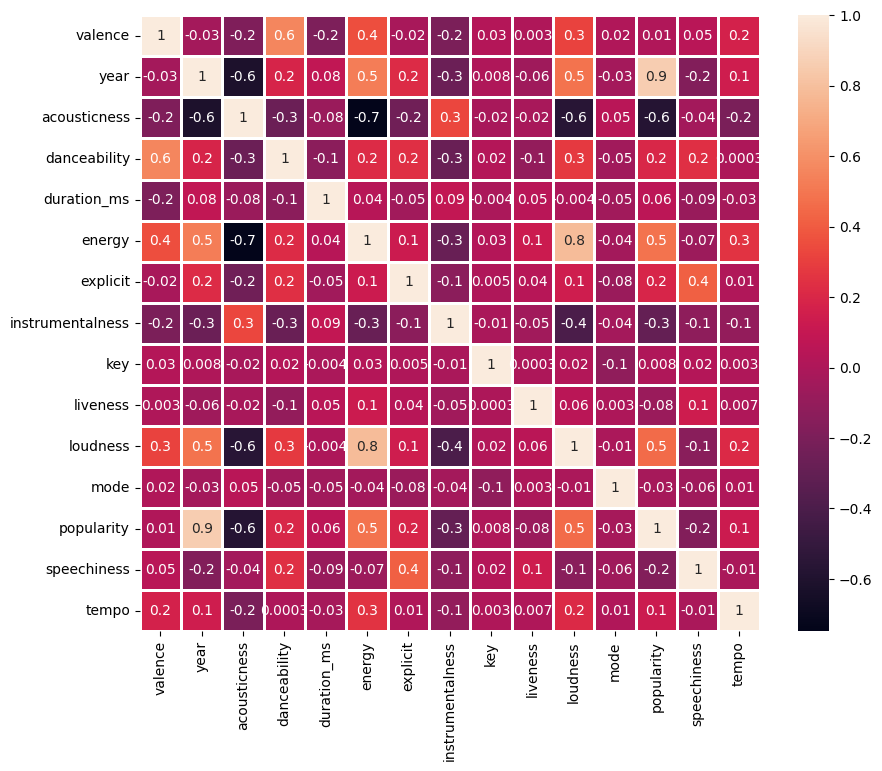

In [92]:
# Correlation

plt.figure(figsize = (10, 8))
corr = songs.corr()

sns.heatmap(data = corr, annot = True, fmt = '.1g', linewidth = 1)
plt.show()

# Data Visualization

The correlation matrix displays Pearson's correlation coefficients (PCC) between variables. PCC close to 1 indicates a positive linear relationship, while -1 suggests a negative one. PCC near 0 implies little association.

Setting a threshold of 0.5, we observe:

1. A strong 0.90 PCC between 'year' and 'popularity,' likely influenced by Spotify's algorithm favoring recent releases.
  
2. 'Acousticness' declines over the years (-0.6 PCC with 'year'), possibly due to technological advancements in music production.

3. As 'acousticness' drops, 'energy' rises (-0.7 PCC), in line with Spotify's definition. Energetic tracks remain popular over the years (0.5 PCC with 'year').

4. 'Valence' (positiveness) correlates with 'danceability,' reflecting the alignment of happiness and danceability in songs.

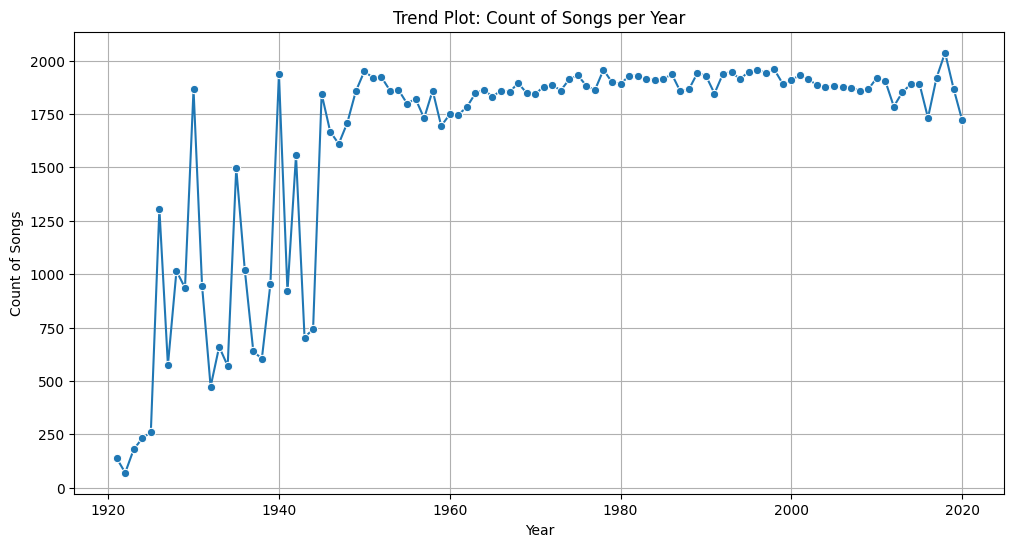

In [93]:
# Count the number of unique names (songs) for each year
songs_per_year = songs.groupby('year')['name'].nunique().reset_index()

# Create a trend plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='name', data=songs_per_year, marker = 'o')
plt.title('Trend Plot: Count of Songs per Year')
plt.xlabel('Year')
plt.ylabel('Count of Songs')
plt.grid(True)
plt.show()


In [94]:
# Find the most popular song for each year
pop_year = songs.sort_values('popularity', ascending= False).groupby('year').first()
pop_year = pop_year.reset_index()
pop_year = pop_year[['year', 'artists', 'name', 'popularity']]
pop_year

,year,artists,name,popularity
0,1921,khp kridhamardawa karaton ngayogyakarta hadini...,Gati Mardika,6
1,1922,uli,Carve,6
2,1923,bessie smith,Nobody Knows You When You're Down and Out,42
3,1924,paul whiteman & his orchestra,Mississippi Mud (feat. Bix Beiderbecke),13
4,1925,tommy dorsey,"On the Sunny Side of the Street (From ""Is Ever...",37
...,...,...,...,...
95,2016,james arthur,Train Wreck,88
96,2017,imagine dragons,Believer,87
97,2018,billie eilish,lovely (with Khalid),89
98,2019,harry styles,Watermelon Sugar,94


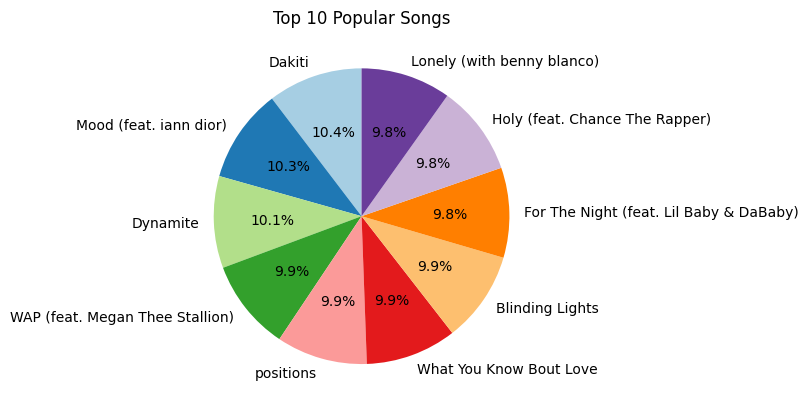

In [95]:
# Select the top 10 songs based on popularity
top_songs = songs.nlargest(10, 'popularity')

# Create a pie chart
plt.pie(top_songs['popularity'], labels=top_songs['name'], autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Top 10 Popular Songs')
plt.show()


In [96]:
songs['decade'] = songs['year'].apply(lambda year : f'{(year//10)*10}s' )

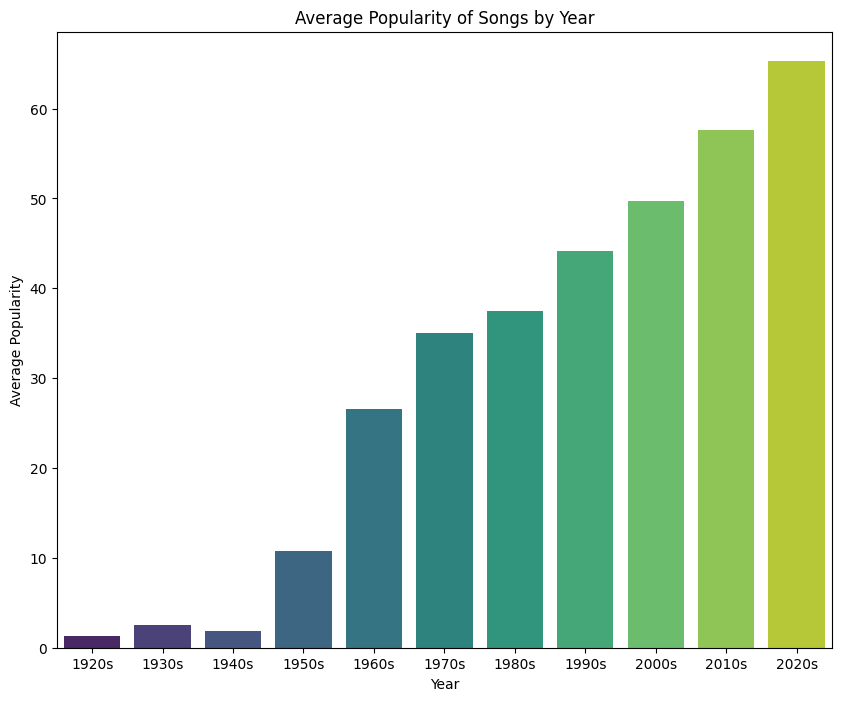

In [97]:
# Group by decade and calculate the average popularity
popularity_by_year = songs.groupby('decade')['popularity'].mean().reset_index()

# Plot the average popularity by year
plt.figure(figsize=(10, 8))
sns.barplot(x='decade', y='popularity', data=popularity_by_year, palette='viridis')
plt.title('Average Popularity of Songs by Year')
plt.xlabel('Year')
plt.ylabel('Average Popularity')
plt.show()


<Axes: xlabel='count', ylabel='decade'>

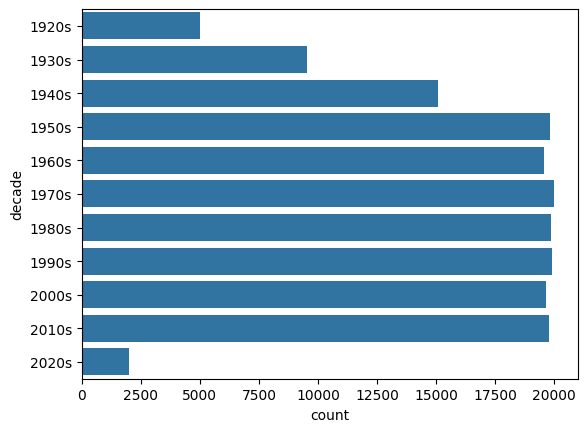

In [98]:
sns.countplot(songs['decade'],)

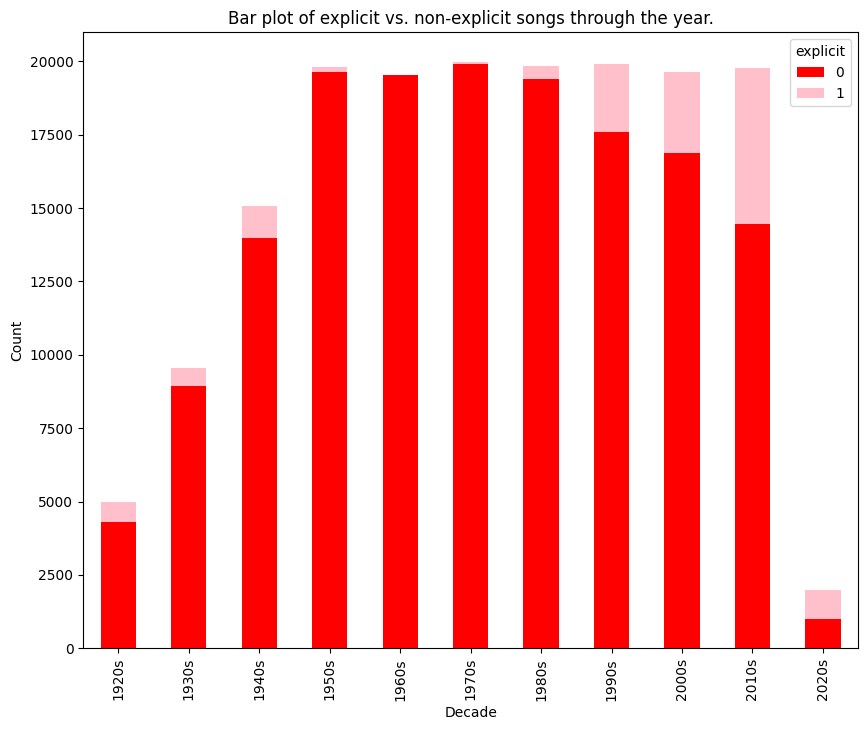

In [99]:
# Group by decade and explicit, and create a stacked bar plot
songs.groupby(["decade", "explicit"]).size().unstack().plot(kind="bar", stacked=True, figsize=(10, 8), color=["Red", "Pink"])

plt.xlabel("Decade")
plt.ylabel("Count")
plt.title("Bar plot of explicit vs. non-explicit songs through the year.")
plt.show()


Songs containing explicit content, including foul language, curse words, and violence, have consistently outnumbered their non-explicit counterparts in every decade. In other words Explicit songs have consistently surpassed non-explicit ones in production across all decades.

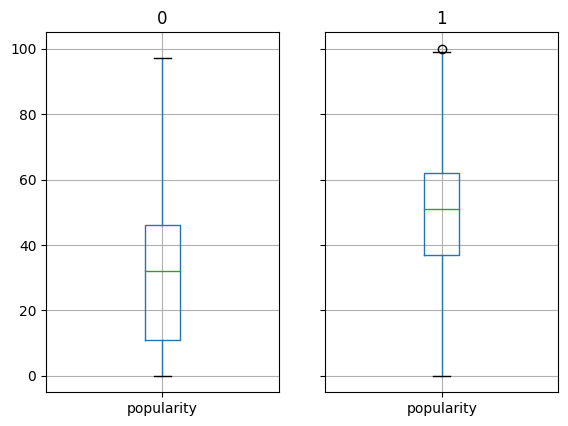

In [100]:
songs.groupby("explicit").boxplot(column="popularity")
plt.show()

The popularity of the explicit songs are higher than that of the no explicit songs.

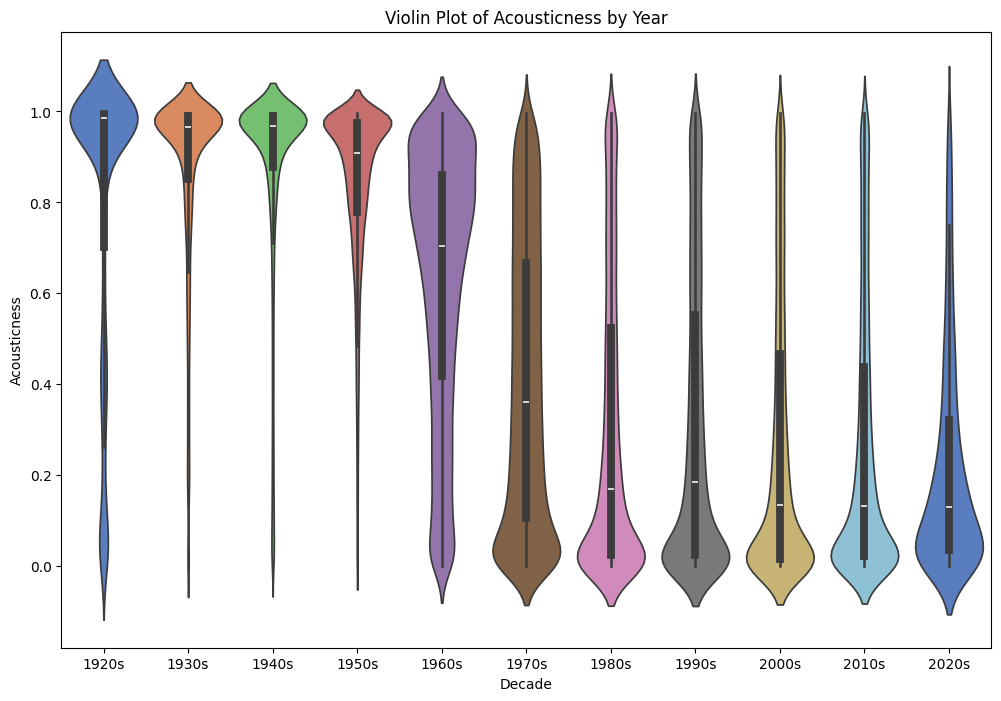

In [101]:
plt.figure(figsize=(12, 8))
sns.violinplot(x='decade', y='acousticness', data=songs, palette='muted')
plt.title('Violin Plot of Acousticness by Year')
plt.xlabel('Decade')
plt.ylabel('Acousticness')
plt.show()

Wider the shape of the violin illustartes the higher probability density of the data. From the graph we can say that the violin shape is shifting from top to bottom as we go further in years, in other words it is the evidence for the comment made on the accousticness behaviour yearly in correlation heatmap.

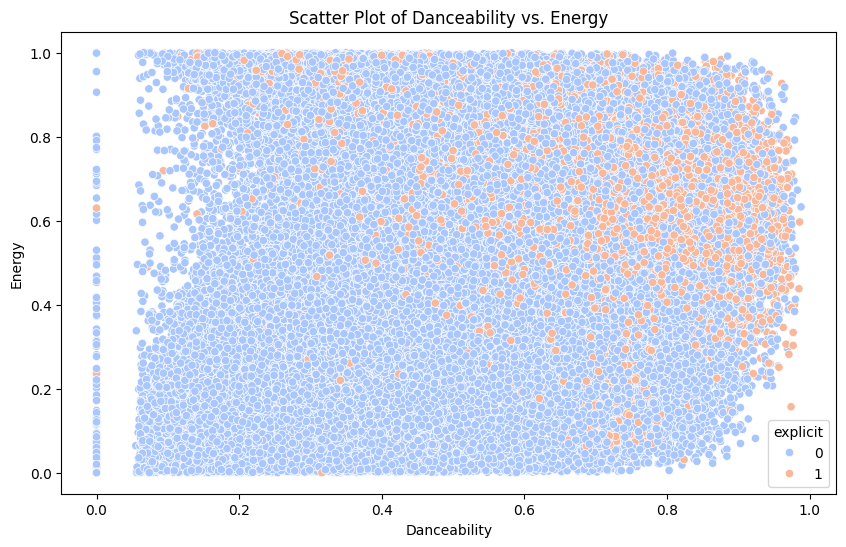

In [102]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='danceability', y='energy', data=songs, hue='explicit', palette='coolwarm')
plt.title('Scatter Plot of Danceability vs. Energy')
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.show()

In [103]:
top10_popular_artists = songs.nlargest(10, 'popularity')
print('Top 10 Artists that had most popularity score:')
top10_popular_artists[['popularity','artists']].sort_values('popularity',ascending=False)

Top 10 Artists that had most popularity score:


,popularity,artists
19611,100,bad bunny
19606,99,24kgoldn
19618,97,bts
19608,96,cardi b
19610,96,ariana grande
19612,96,pop smoke
19616,96,the weeknd
19607,95,pop smoke
19615,95,justin bieber
19620,95,justin bieber


In [104]:
songs = songs[songs['year']>2000]

In [105]:
songs['mode'] = songs['mode'].astype(bool)
songs['explicit'] = songs['explicit'].astype(bool)

In [106]:
song_cluster_pipeline = Pipeline([('scaler', StandardScaler()),
                                  ('kmeans', KMeans(n_clusters=25,
                                   verbose=False))
                                 ], verbose=False)

X = songs.select_dtypes(np.number)
song_cluster_pipeline.fit(X)
song_cluster_labels = song_cluster_pipeline.predict(X)
songs['cluster_label'] = song_cluster_labels

In [107]:
pca_pipeline = Pipeline([('scaler', StandardScaler()), ('PCA', PCA(n_components=2))])
song_embedding = pca_pipeline.fit_transform(X)
projection = pd.DataFrame(columns=['x', 'y'], data=song_embedding)
projection['title'] = songs['name']
projection['cluster'] = songs['cluster_label']

fig = px.scatter(
    projection, x='x', y='y', color='cluster', hover_data=['x', 'y', 'title'],title='Clusters of songs')
fig.show()

In [108]:
songs['artists']

15806      jimmy eat world
15807                train
15808           papa roach
15809               weezer
15810     system of a down
                ...       
170648            anuel aa
170649            ashnikko
170650             mamamoo
170651              eminem
170652               kevvo
Name: artists, Length: 39435, dtype: object

In [109]:
print(songs.head())

       valence  year  acousticness           artists  danceability  \
15806    0.903  2001      0.037100   jimmy eat world         0.643   
15807    0.499  2001      0.154000             train         0.468   
15808    0.692  2001      0.000481        papa roach         0.589   
15809    0.661  2001      0.007190            weezer         0.654   
15810    0.286  2001      0.000278  system of a down         0.419   

       duration_ms  energy  explicit  instrumentalness  key  liveness  \
15806       165853   0.849     False           0.00000    2     0.058   
15807       259933   0.640     False           0.00000    0     0.154   
15808       199907   0.890      True           0.00082    4     0.201   
15809       200307   0.810     False           0.00251    4     0.165   
15810       210240   0.934     False           0.00150    7     0.132   

       loudness   mode                        name  popularity  speechiness  \
15806    -5.428   True                  The Middle          7

In [110]:
def popularity_based_recommendation(songs, n=10):
    # Sort the DataFrame by popularity in descending order
    popular_songs = songs.sort_values(by='popularity', ascending=False)

    # Select the top 'n' popular songs
    top_n_popular_songs = popular_songs.head(n)

    return top_n_popular_songs[['name', 'popularity']]

# Example: Get top 10 popular songs
top_popular_songs = popularity_based_recommendation(songs, n=10)

# Display top popular songs
print('Top Popular Songs:')
print(top_popular_songs)


Top Popular Songs:
                                          name  popularity
19611                                   Dakiti         100
19606                   Mood (feat. iann dior)          99
19618                                 Dynamite          97
19616                          Blinding Lights          96
19608          WAP (feat. Megan Thee Stallion)          96
19610                                positions          96
19612                  What You Know Bout Love          96
19615           Holy (feat. Chance The Rapper)          95
19623                       you broke me first          95
19607  For The Night (feat. Lil Baby & DaBaby)          95


#Song Recommendation based on their similarity to a given song using cosine similarity.

"This code exemplifies a collaborative filtering method, specifically content-based recommendation, which utilizes the inherent features of music. By focusing on the artist name as the chosen feature, the code employs cosine similarity, a mathematical measure of angle between vectors, to compare the artist representations (transformed into numerical vectors through CountVectorizer) of various songs. Those with closer vector angles, indicating similarity in artists, are more likely to share musical traits and thus, are suggested as recommendations. This practical implementation of the theoretical notion is demonstrated through the generation of song recommendations for "Dynamite". Although the current example uses artist names, other attributes can also be utilized."


In [111]:

def cosine_similarity_recommendation(songs, song_name, n=5):
    # Create a CountVectorizer to convert the artist names into a matrix of token counts
    count_vectorizer = CountVectorizer()
    artist_matrix = count_vectorizer.fit_transform(songs['artists'])

    # Compute cosine similarity between songs based on artists
    cosine_similarities = cosine_similarity(artist_matrix, artist_matrix)

    # Get the index of the song in the DataFrame
    song_index = songs[songs['name'] == 'Before You Go'].index[0]

    # Get the cosine similarity scores for the given song
    similarity_scores = list(enumerate(cosine_similarities[song_index]))

    # Sort songs based on similarity scores
    sorted_songs = sorted(similarity_scores, key=lambda x: x[1], reverse=True)[1:]  # Exclude the input song

    # Get the indices of the top 'n' recommended songs
    top_indices = [index for index, _ in sorted_songs[:n]]

     # Get the recommended songs from the DataFrame
    recommended_songs = songs.iloc[top_indices, [13, 14]]

    return recommended_songs

# Example: Get top 10 recommended songs based on cosine similarity for a given song
song_name_input = "Dynamite"  # Replace with an actual song name
top_cosine_similarity_recommendations = cosine_similarity_recommendation(songs, song_name_input, n=10)

# Display top recommended songs based on cosine similarity
print(f'Top Recommended Songs for "{song_name_input}":')
print(top_cosine_similarity_recommendations)

Top Recommended Songs for "Dynamite":
                                             name  popularity
19553                           Hot (feat. Gunna)          75
19595   The London (feat. J. Cole & Travis Scott)          76
37704                                       Check          64
37753                                      Digits          66
37769                           pick up the phone          68
37805                                 Wyclef Jean          65
38241                Bad Bad Bad (feat. Lil Baby)          73
38331   The London (feat. J. Cole & Travis Scott)          75
38377  Hot (Remix) [feat. Gunna and Travis Scott]          72
56216                                 Best Friend          63


In [112]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [113]:
# Data setup
features = ['valence', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'loudness', 'speechiness', 'tempo']
data = songs # Load your actual data here

In [114]:
# Train-test split
X = data[features]
y = data['popularity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


# Linear Rgression

In [115]:

from sklearn.linear_model import LinearRegression



# User input and song lookup
user_song_name = 'Dynamite'
song_index = data[data['name'] == user_song_name].index

if len(song_index) == 0:
    print(f"Sorry, we couldn't find '{user_song_name}' in our database.")
else:
    user_song_features = data.loc[song_index, features].values


    # Create and train the linear regression model
    L = LinearRegression()
    L.fit(X_train, y_train)

    # Predict popularity for user's chosen song and other songs
    user_song_pred = L.predict(user_song_features)[0]
    song_preds = L.predict(X_test)

    # Recommend top N songs with similar predicted popularity
    N = 10
    diffs = np.abs(song_preds - user_song_pred)  # Calculate absolute differences
    closest_indices = diffs.argsort()[:N]  # Get indices of N closest songs
    recommended_songs = data.loc[X_test.index[closest_indices], 'name'].tolist()

    print(f"Recommendations based on '{user_song_name}':")
    for song in recommended_songs:
        print(f"- {song}")


Recommendations based on 'Dynamite':
- No Se De Ella "My Space"
- I Choose You
- Run
- Te Quise Olvidar
- Invincible
- Another Way to Die
- Take Me Away - Radio Edit
- Me Pones en Tensión
- La Valse d'Amélie - Version orchestre
- Island, IS


In [116]:
from sklearn.metrics import mean_squared_error, r2_score
# Performance metrics on test set
y_pred = L.predict(X_test)

# Mean Squared Error (for regression)
mse = mean_squared_error(y_test, y_pred)
print("Performance Metrics:")
print(f"- Mean Squared Error: {mse:.4f}")

# R-squared (for regression)
r2 = r2_score(y_test, y_pred)
print(f"- R-squared: {r2:.4f}")

Performance Metrics:
- Mean Squared Error: 162.6231
- R-squared: 0.0575


# Support Vector Regression

In [117]:

# User input and song lookup
user_song_name = 'Dynamite'
song_index = data[data['name'] == user_song_name].index

if len(song_index) == 0:
    print(f"Sorry, we couldn't find '{user_song_name}' in our database.")
else:
    user_song_features = data.loc[song_index, features].values


    # Create and train the model
    S = svm.SVC()

    S.fit(X_train, y_train)
    # Predict popularity for user's chosen song and other songs
    user_song_pred = S.predict(user_song_features)[0]
    song_preds = S.predict(X_test)
    # Recommend top N songs with similar predicted popularity
    N = 10
    diffs = np.abs(song_preds - user_song_pred)  # Calculate absolute differences
    closest_indices = diffs.argsort()[:N]  # Get indices of N closest songs
    recommended_songs = data.loc[X_test.index[closest_indices], 'name'].tolist()

    print(f"Recommendations based on '{user_song_name}':")
    for song in recommended_songs:
        print(f"- {song}")

Recommendations based on 'Dynamite':
- Jopping
- Dead Man Walking
- King Sh*t (feat. T.I.)
- Drunken Poet's Dream
- Lowlife
- Bubalu
- Ice Tray
- Tan Bella Y Tramposa
- Promise
- アルミナ


In [118]:
# Performance metrics on test set
y_pred = S.predict(X_test)

# Mean Squared Error (for regression)
mse = mean_squared_error(y_test, y_pred)
print("Performance Metrics:")
print(f"- Mean Squared Error: {mse:.4f}")

# R-squared (for regression)
r2 = r2_score(y_test, y_pred)
print(f"- R-squared: {r2:.4f}")

Performance Metrics:
- Mean Squared Error: 185.5948
- R-squared: -0.0757


# KNN Regression

In [119]:

# User input and song lookup
user_song_name = 'Dynamite'
song_index = data[data['name'] == user_song_name].index

if len(song_index) == 0:
    print(f"Sorry, we couldn't find '{user_song_name}' in our database.")
else:
    user_song_features = data.loc[song_index, features].values

    # Create and train the model
    KNN = KNeighborsRegressor(n_neighbors=5)  # Adjust n_neighbors as needed
    KNN.fit(X_train, y_train)
    # Predict popularity for user's chosen song and other songs
    user_song_pred = KNN.predict(user_song_features)[0]
    song_preds = KNN.predict(X_test)
    # Recommend top N songs with similar predicted popularity
    N = 10
    diffs = np.abs(song_preds - user_song_pred)  # Calculate absolute differences
    closest_indices = diffs.argsort()[:N]  # Get indices of N closest songs
    recommended_songs = data.loc[X_test.index[closest_indices], 'name'].tolist()

    print(f"Recommendations based on '{user_song_name}':")
    for song in recommended_songs:
        print(f"- {song}")

Recommendations based on 'Dynamite':
- Ghost
- Lovers
- Hard To Tell
- Whoa, I'm Woeful
- Laundromat - Radio Edit
- Mousercise
- Blue Bayou - 1999 Remaster
- Punk
- Be Above It
- La Escuadra (En Que Trabaja El Muchacho)


In [120]:
# Performance metrics on test set
y_pred = KNN.predict(X_test)

# Mean Squared Error (for regression)
mse = mean_squared_error(y_test, y_pred)
print("Performance Metrics:")
print(f"- Mean Squared Error: {mse:.4f}")

# R-squared (for regression)
r2 = r2_score(y_test, y_pred)
print(f"- R-squared: {r2:.4f}")

Performance Metrics:
- Mean Squared Error: 183.6140
- R-squared: -0.0642


# K Means Clustering

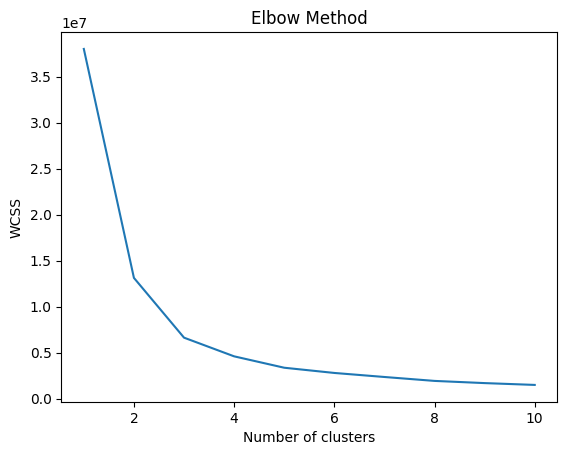

In [121]:
# Determine optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):  # Explore a range of possible k values
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)  # Set random_state for reproducibility
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [122]:
# Determine optimal number of clusters using the Silhouette Coefficient
from sklearn.metrics import silhouette_score

best_k = -1
best_silhouette_score = -1

for k in range(2, 11):  # Explore a range of possible k values
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(X, labels)

    print(f"For k = {k}, silhouette score = {silhouette_avg}")

    if silhouette_avg > best_silhouette_score:
        best_k = k
        best_silhouette_score = silhouette_avg

print(f"Best k based on Silhouette Coefficient: {best_k}")

For k = 2, silhouette score = 0.5530324347798874
For k = 3, silhouette score = 0.5414944683961601
For k = 4, silhouette score = 0.48103780295782633
For k = 5, silhouette score = 0.47829655498835183
For k = 6, silhouette score = 0.446255839733247
For k = 7, silhouette score = 0.45198494951103985
For k = 8, silhouette score = 0.4387623676450357
For k = 9, silhouette score = 0.42340181583543934
For k = 10, silhouette score = 0.4192229386711312
Best k based on Silhouette Coefficient: 2


In [123]:
from sklearn.cluster import KMeans

# User input and song lookup
user_song_name = 'Dynamite'
song_index = data[data['name'] == user_song_name].index

if len(song_index) == 0:
    print(f"Sorry, we couldn't find '{user_song_name}' in our database.")
else:
    user_song_features = data.loc[song_index, features].values

    # Determine optimal number of clusters (code not shown)

    # Create and fit the k-means model
    KM = KMeans(n_clusters=2)
    KM.fit(X)  # Assuming X is the matrix of song features

    # Access cluster labels using the correct index
    user_song_cluster = KM.labels_[song_index[0]]  # Use the first (and only) index from song_index
    song_clusters = KM.labels_

    # Recommend songs from the same cluster
    recommendations = data[data['name'].isin(data[song_clusters == user_song_cluster]['name'])]
    recommended_songs = recommendations.sort_values(by='popularity', ascending=False)['name'].tolist()[:N]

    print(f"Recommendations based on '{user_song_name}':")
    for song in recommended_songs:
        print(f"- {song}")


Recommendations based on 'Dynamite':
- WAP (feat. Megan Thee Stallion)
- positions
- Blinding Lights
- For The Night (feat. Lil Baby & DaBaby)
- you broke me first
- Lemonade
- Head & Heart (feat. MNEK)
- Relación - Remix
- Laugh Now Cry Later (feat. Lil Durk)
- UN DIA (ONE DAY) (Feat. Tainy)


In [124]:
# Performance metrics on test set
y_pred = KM.predict(X_test)

# Mean Squared Error (for regression)
mse = mean_squared_error(y_test, y_pred)
print("Performance Metrics:")
print(f"- Mean Squared Error: {mse:.4f}")

# R-squared (for regression)
r2 = r2_score(y_test, y_pred)
print(f"- R-squared: {r2:.4f}")


Performance Metrics:
- Mean Squared Error: 3114.7429
- R-squared: -17.0527


# Decision Tree

In [125]:

from sklearn.tree import DecisionTreeRegressor

# User input and song lookup
user_song_name = 'Dynamite'
song_index = data[data['name'] == user_song_name].index

if len(song_index) == 0:
    print(f"Sorry, we couldn't find '{user_song_name}' in our database.")
else:
    user_song_features = data.loc[song_index, features].values


    # Create and train the model
    DT = DecisionTreeRegressor()

    DT.fit(X_train, y_train)
    # Predict popularity for user's chosen song and other songs
    user_song_pred = DT.predict(user_song_features)[0]
    song_preds = DT.predict(X_test)
    # Recommend top N songs with similar predicted popularity
    N = 10
    diffs = np.abs(song_preds - user_song_pred)  # Calculate absolute differences
    closest_indices = diffs.argsort()[:N]  # Get indices of N closest songs
    recommended_songs = data.loc[X_test.index[closest_indices], 'name'].tolist()

    print(f"Recommendations based on '{user_song_name}':")
    for song in recommended_songs:
        print(f"- {song}")

Recommendations based on 'Dynamite':
- Loco por Ti
- Dark Horse
- Need You Now
- Bottom of the River
- The Duck Song
- I'm Gonna Getcha Good! - Red Version
- Sunflower - Spider-Man: Into the Spider-Verse
- Breeze Rain
- Where Would I Be (The Question)
- So Far Away


In [126]:
# Performance metrics on test set
y_pred = DT.predict(X_test)

# Mean Squared Error (for regression)
mse = mean_squared_error(y_test, y_pred)
print("Performance Metrics:")
print(f"- Mean Squared Error: {mse:.4f}")

# R-squared (for regression)
r2 = r2_score(y_test, y_pred)
print(f"- R-squared: {r2:.4f}")

Performance Metrics:
- Mean Squared Error: 303.9676
- R-squared: -0.7618


# Random Forest

In [127]:


# User input and song lookup
user_song_name = 'Dynamite'
song_index = data[data['name'] == user_song_name].index

if len(song_index) == 0:
    print(f"Sorry, we couldn't find '{user_song_name}' in our database.")
else:
    user_song_features = data.loc[song_index, features].values



    # Create and train the Random Forest model
    RF = RandomForestRegressor(n_estimators=100, random_state=42)  # Adjust hyperparameters as needed
    RF.fit(X_train, y_train)

    # Predict popularity for user's chosen song and other songs
    user_song_pred = RF.predict(user_song_features)[0]
    song_preds = RF.predict(X_test)

    # Recommend top N songs with similar predicted popularity
    N = 10
    diffs = np.abs(song_preds - user_song_pred)  # Calculate absolute differences
    closest_indices = diffs.argsort()[:N]  # Get indices of N closest songs
    recommended_songs = data.loc[X_test.index[closest_indices], 'name'].tolist()

    print(f"Recommendations based on '{user_song_name}':")
    for song in recommended_songs:
        print(f"- {song}")

Recommendations based on 'Dynamite':
- John Doe featuring MZ Lelee
- 1942 (feat. Yo Gotti & YBN Nahmir)
- Look At Me!
- HAD ENOUGH (feat. Quavo & Offset)
- Nun Major
- Bubalu
- Slow Down
- Cruise
- Snuff
- 20 Min


In [128]:
# Performance metrics on test set
y_pred = RF.predict(X_test)

# Mean Squared Error (for regression)
mse = mean_squared_error(y_test, y_pred)
print("Performance Metrics:")
print(f"- Mean Squared Error: {mse:.4f}")

# R-squared (for regression)
r2 = r2_score(y_test, y_pred)
print(f"- R-squared: {r2:.4f}")


Performance Metrics:
- Mean Squared Error: 144.4319
- R-squared: 0.1629


In [129]:
from sklearn.metrics import mean_squared_error, r2_score

def evaluate_model(model_name, y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    return {
        'Model': model_name,
        'Mean Squared Error': mse,
        'R-squared': r2
    }

# Assuming you have predictions for different models stored in y_pred_list
models = ['L', 'S', 'KNN', 'KM', 'DT', 'RF']
y_preds = [L.predict(X_test), S.predict(X_test), KNN.predict(X_test), KM.predict(X_test), DT.predict(X_test), RF.predict(X_test)]

results = []

for model_name, y_pred in zip(models, y_preds):
    result = evaluate_model(model_name, y_test, y_pred)
    results.append(result)

# Print results
for result in results:
    print(f"Model: {result['Model']}")
    print(f"- Mean Squared Error: {result['Mean Squared Error']:.4f}")
    print(f"- R-squared: {result['R-squared']:.4f}")
    print("\n")

# Find the best model based on a chosen metric (e.g., R-squared)
best_model = max(results, key=lambda x: x['R-squared'])
print(f"The best model is: {best_model['Model']} with R-squared: {best_model['R-squared']:.4f}")


Model: L
- Mean Squared Error: 162.6231
- R-squared: 0.0575


Model: S
- Mean Squared Error: 185.5948
- R-squared: -0.0757


Model: KNN
- Mean Squared Error: 183.6140
- R-squared: -0.0642


Model: KM
- Mean Squared Error: 3114.7429
- R-squared: -17.0527


Model: DT
- Mean Squared Error: 303.9676
- R-squared: -0.7618


Model: RF
- Mean Squared Error: 144.4319
- R-squared: 0.1629


The best model is: RF with R-squared: 0.1629


In [130]:
import pickle

In [131]:
data =data.drop(columns=['artists', 'decade'])

In [ ]:
features = ['valence', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'loudness', 'speechiness', 'tempo']

In [141]:
data = data.drop(columns = ['year','duration_ms','explicit','key', 'liveness','mode','popularity', 'cluster_label'])

In [142]:
data.columns

Index(['valence', 'acousticness', 'danceability', 'energy', 'instrumentalness',
       'loudness', 'name', 'speechiness', 'tempo'],
      dtype='object')

In [143]:
pickle.dump(data,open('data.pkl','wb'))

In [133]:
pickle.dump(RF,open('random_forest_model.pkl', 'wb'))


# Creating an Application for the Song Recommendation

In [134]:
pip install streamlit

In [135]:
%%writefile recommender_app.py

Overwriting recommender_app.py


In [144]:
! wget -q -O - ipv4.icanhazip.com


34.74.87.76


In [ ]:
! streamlit run recommender_app.py & npx localtunnel --port 8501

[..................] \ fetchMetadata: sill resolveWithNewModule localtunnel@2.0


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.74.87.76:8501

npx: installed 22 in 3.075s
your url is: https://yummy-ducks-raise.loca.lt
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
2024-02-06 15:24:25.137 Uncaught app exception
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/streamlit/runtime/scriptrunner/script_runner.py", line 535, in _run_script
    exec(code, module.__dict__)
  File "/content/recommender_app.py", line 36, in <module>
    recommendations = recommend(selected_song)
  File "/content/recommender_app.py", line 26, in recommend
    recommended_songs = data.loc[closest_indices, 'name'].tolist()
  File "/usr/local/lib/python3.10/dist-packages/panda